# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# https://pypi.python.org/pypi/citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
params = {
    "appid": weather_api_key
}
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_df = pd.DataFrame({"City Name" : cities})
city_df ["Lat"] = ""
city_df ["Lng"] = ""
city_df ["Max_temp"] = ""
city_df ["Humidity"] = ""
city_df ["Cloudiness"] = ""
city_df ["Wind"] = ""
city_df ["Country"] = ""
city_df ["Date"] = ""

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for index, row in city_df.iterrows():
    params["q"] = row["City Name"]
    response_json = requests.get(query_url+row["City Name"]).json()
    try:
        city_df.loc[index, "Lat"] = response_json['coord']['lat']
        city_df.loc[index, "Lng"] = response_json['coord']['lon'] 
        city_df.loc[index, "Max_temp"] = response_json["main"]["temp_max"]
        city_df.loc[index, "Humidity"] = response_json['main']['humidity']
        city_df.loc[index, "Cloudiness"] = response_json['clouds']['all']
        city_df.loc[index, "Wind"] = response_json['wind']['speed']
        city_df.loc[index, "Country"] = response_json['sys']['country']
        city_df.loc[index, "Date"] = response_json['dt']
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

        print(response_json)

Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
{'cod': '404', 'message': 'cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:

nan_value = float("NaN")
# Convert NaN values to empty string

city_df.replace("", nan_value, inplace=True)
weather_df=city_df.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False)
weather_df.reset_index(level=None, drop=True, inplace=False)


,City Name,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind,Country,Date
0,hilo,19.73,-155.09,84.20,58.0,75.0,10.29,US,1.595555e+09
1,nikolskoye,59.70,30.79,52.00,81.0,20.0,4.47,RU,1.595555e+09
2,bluff,-46.60,168.33,46.78,71.0,100.0,26.64,NZ,1.595555e+09
3,oktyabrskoye,43.06,44.74,71.60,53.0,0.0,8.95,RU,1.595555e+09
4,saint-joseph,-21.37,55.62,66.20,55.0,90.0,19.46,RE,1.595555e+09
...,...,...,...,...,...,...,...,...,...
540,christchurch,-43.53,172.63,53.60,37.0,0.0,1.12,NZ,1.595555e+09
541,coffs harbour,-30.30,153.13,60.80,87.0,75.0,8.05,AU,1.595555e+09
542,copiapo,-27.37,-70.33,50.00,76.0,20.0,4.70,CL,1.595555e+09
543,ngunguru,-35.62,174.50,62.01,3.0,27.0,8.01,NZ,1.595555e+09


In [10]:
weather_df.to_csv("CityWeather.csv")

# Visualize to confirm weather data appears
weather_df.head(25)

,City Name,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind,Country,Date
0,hilo,19.73,-155.09,84.20,58.0,75.0,10.29,US,1.595555e+09
1,nikolskoye,59.70,30.79,52.00,81.0,20.0,4.47,RU,1.595555e+09
2,bluff,-46.60,168.33,46.78,71.0,100.0,26.64,NZ,1.595555e+09
5,oktyabrskoye,43.06,44.74,71.60,53.0,0.0,8.95,RU,1.595555e+09
6,saint-joseph,-21.37,55.62,66.20,55.0,90.0,19.46,RE,1.595555e+09
7,srednekolymsk,67.45,153.68,89.22,28.0,3.0,6.91,RU,1.595555e+09
8,ambilobe,-13.20,49.05,67.39,64.0,68.0,2.62,MG,1.595555e+09
9,mataura,-46.19,168.86,44.10,70.0,100.0,9.13,NZ,1.595555e+09
10,ushuaia,-54.80,-68.30,39.20,87.0,40.0,16.11,AR,1.595555e+09
11,yellowknife,62.46,-114.35,61.00,82.0,75.0,17.22,CA,1.595555e+09


In [11]:
weather_df.count()

City Name     545
Lat           545
Lng           545
Max_temp      545
Humidity      545
Cloudiness    545
Wind          545
Country       545
Date          545
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_df.describe()

,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.521927,22.900569,68.284239,72.192661,50.834862,7.349798,1.595555e+09
std,33.722308,90.318167,13.363916,19.138657,39.755067,5.116605,5.839432e+01
min,-54.800000,-179.170000,19.400000,3.000000,0.000000,0.270000,1.595555e+09
25%,-6.540000,-54.840000,59.000000,63.000000,5.000000,3.360000,1.595555e+09
50%,25.210000,27.620000,68.740000,77.000000,56.000000,5.820000,1.595555e+09
75%,48.770000,100.340000,78.800000,87.000000,90.000000,10.290000,1.595555e+09
max,78.220000,179.320000,98.380000,100.000000,100.000000,29.240000,1.595555e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

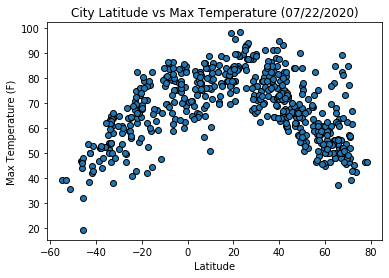

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Max_temp"], marker="o", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (07/22/2020)')
plt.show()

## Latitude vs. Humidity Plot

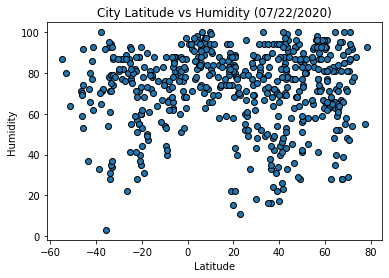

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (07/22/2020)')
plt.show()

## Latitude vs. Cloudiness Plot

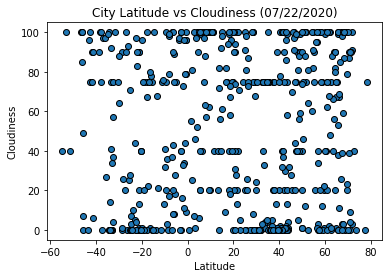

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (07/22/2020)')
plt.show()

## Latitude vs. Wind Speed Plot

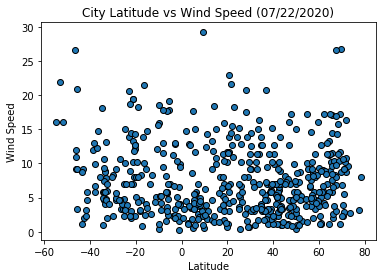

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Wind"], marker="o", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (07/22/2020)')
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = weather_df['Lat']
y_values = weather_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      7.356511
1      7.017708
2      7.918752
5      7.158756
6      7.704892
         ...   
592    7.892729
593    7.780586
594    7.755750
595    7.825681
596    6.944472
Name: Lat, Length: 545, dtype: float64


In [18]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_df['Lat']>0
north_df = weather_df[north_df]
south_df = weather_df['Lat']<0
south_df = weather_df[south_df]

south_df.head()

,City Name,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind,Country,Date
2,bluff,-46.60,168.33,46.78,71.0,100.0,26.64,NZ,1.595555e+09
6,saint-joseph,-21.37,55.62,66.20,55.0,90.0,19.46,RE,1.595555e+09
8,ambilobe,-13.20,49.05,67.39,64.0,68.0,2.62,MG,1.595555e+09
9,mataura,-46.19,168.86,44.10,70.0,100.0,9.13,NZ,1.595555e+09
10,ushuaia,-54.80,-68.30,39.20,87.0,40.0,16.11,AR,1.595555e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40480835257760794


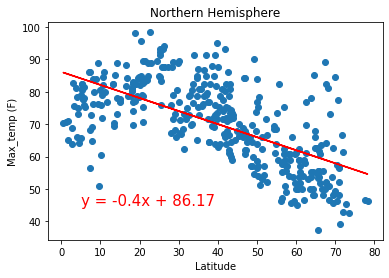

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Latitude Linear Regression in the Northern Hemisphere
x_values = north_df['Lat']
y_values = north_df['Max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_temp (F)')
plt.title('Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5808359292031665


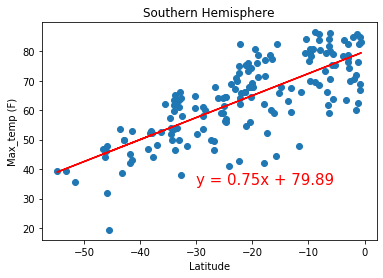

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Latitude Linear Regression in the Southern Hemisphere
x_values = south_df['Lat']
y_values = south_df['Max_temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_temp (F)')
plt.title('Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015394969937357242


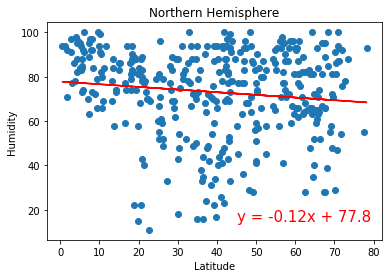

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Humidity Linear Regression in the Northern Hemisphere
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002863809764982511


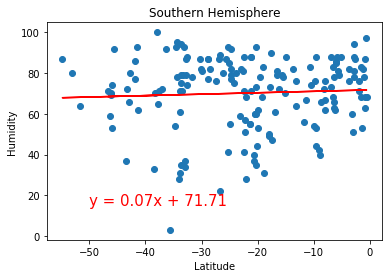

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Humidity Linear Regression in the Southern Hemisphere
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007496742179249085


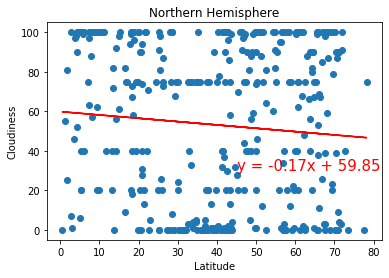

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Cloudiness Linear Regression in the Northern Hemisphere
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00010993827887609868


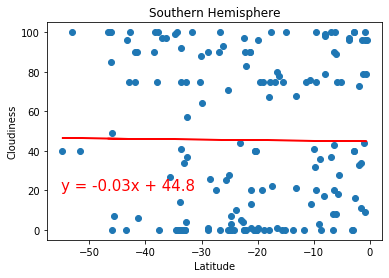

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Cloudiness Linear Regression in the Southern Hemisphere
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008544873501724002


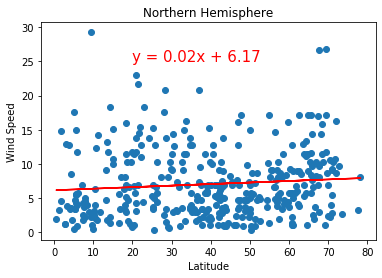

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Wind Speed Linear Regression in the Northern Hemisphere
x_values = north_df['Lat']
y_values = north_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002863809764982511


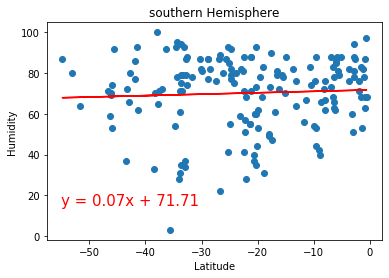

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp vs Humidity Linear Regression in the Southern Hemisphere
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()